# Unregularized SVM Classification

### Setting up the environment

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
np.random.seed(100)

### Generating data

In [2]:
# Parameters
num_dims = 2
num_data_points = 100
data_size = (num_data_points, num_dims)
x_scale = np.array([[20., 20.]])
x_offset = np.array([[-10., -10.]])
noise_scale = 8.
weights_scale = np.array([10., 10.])
weights_offset = np.array([-5., -5.])

weights = (np.random.random((num_dims,)) * weights_scale) + weights_offset

In [3]:
# Generating the data
X = (np.random.random(data_size) * np.tile(x_scale, (num_data_points, 1))) + np.tile(x_offset, (num_data_points, 1))

Xa = np.concatenate((np.ones((num_data_points, 1)), X[:, :-1]), 1)
z = (Xa @ weights) + np.random.normal(0., noise_scale, (num_data_points,))
classes = (z > X[:, -1]).astype(int)
y = (2 * classes) - 1

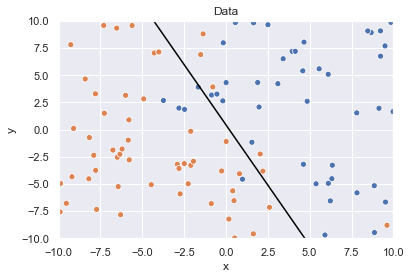

In [4]:
# Visualization
fig_data = plt.figure()
plt.xlabel('x')
plt.xlim((-10, 10))
plt.ylabel('y')
plt.ylim((-10, 10))
plt.title('Data')
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=classes, legend=False)
sns.lineplot(x=Xa[:, 1], y=Xa @ weights, color='black', legend=False, ax=ax)
plt.show()

### Classification

In [5]:
# Parameters
alpha = 1e-4
tolerance = 1e-2
max_iterations = 1000

In [6]:
# Classification
trace_w = []
trace_b = []

iteration = 0
last_loss = np.infty
w = 10 * np.random.random((num_dims,)) - 5
b = np.random.random()
trace_w.append(w.copy())
trace_b.append(b)
zhat = (X @ w) + b
mhat = y * zhat
p1 = (mhat < 0)
p2 = np.logical_and(np.logical_not(p1), (mhat < 1))
loss = -np.sum(mhat[p1])
while np.abs(last_loss - loss) > tolerance:
    iteration += 1
    if iteration > max_iterations:
        iteration -= 1
        break
    a1 = -y[None, p1]
    a2 = -y[None, p2] - zhat[None, p2]
    nabla_w = np.squeeze((a1 @ X[p1, :]) + (a2 @ X[p2, :]))
    nabla_b = np.squeeze(np.sum(a1) + np.sum(a2))
    w -= alpha * nabla_w
    b -= alpha * nabla_b
    trace_w.append(w.copy())
    trace_b.append(b)
    zhat = (X @ w) + b
    mhat = y * zhat
    p1 = (mhat < 0)
    p2 = np.logical_and(np.logical_not(p1), (mhat < 1))
    last_loss = loss
    loss = -np.sum(mhat[p1])
print("SVM finished after " + str(iteration) + " iterations.")

SVM finished after 64 iterations.


In [7]:
%%capture
# Creating animated vissualization
fig = plt.figure()
camera = Camera(fig)
plt.xlabel('x')
plt.ylabel('y')

plt.title('SVM Classification')

for i in range(iteration):
    w = trace_w[i]
    b = trace_b[i]
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=classes, legend=False)
    sns.lineplot(x=np.array([-10, 10]), y=-((np.array([-10, 10]) * w[0]) + b) / w[1], color='black', legend=False, ax=ax)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    camera.snap()

animation = camera.animate()
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=classes, legend=False)
plt.show()

In [8]:
# Playing the animation
HTML(animation.to_jshtml())